# SISTEMA FINANCEIRO - PEDRO REBOUÇAS

In [51]:
import pandas as pd
from datetime import datetime

# Carregar o dataset
transacoes_df = pd.read_csv('transacoes.csv', sep=';', decimal= ',')

print("\n" + "=" * 60)
print(transacoes_df.columns)
print(transacoes_df)
print("\n" + "=" * 60)


Index(['tipo', 'descricao', 'valor', 'data', 'modo', 'Beneficiario'], dtype='object')
           tipo                                          descricao     valor  \
0       RECEITA                RECEITA-COMPLEMNTO DE SALDO INICIAL  11190.87   
1       RECEITA       RECEITA-TRANSFERENCI PARA MLHOR REGULAIZACAO    846.60   
2       DESPESA                                    DESPESA-NF. 766   4610.00   
3       DESPESA                                     DESPESA-NF 767   1350.00   
4       DESPESA                                    DESPESA-SANEAGO     16.81   
...         ...                                                ...       ...   
101900  DESPESA  DESPESA-REFERENTE A CONSULTORIA PARA AULAS DA�...  10000.00   
101901  DESPESA                               DESPESA-PLANO D4SIGN    119.90   
101902  RECEITA                  RECEITA-CARTA DE CREDITO SPEAKERS   3618.61   
101903  RECEITA                  RECEITA-CARTA DE CREDITO SPEAKERS  16289.39   
101904  DESPESA                  

# 1. Validações

In [52]:
tipo_enum = ['RECEITA', 'DESPESA']
bancos = ['300', '4175', '7633', '1', 'CMP', '3754', 'FIN', '3','3396', '0300X', '2']


for transacao in transacoes_df.itertuples():
    if transacao.tipo not in tipo_enum:
        print(f"ERRO: Tipo da transação invalido. Preencha com receita ou despesa")
    if transacao.modo not in bancos:
        print(f'ERRO: Modo não Registrado. Banco Inexistente.')

# 2. Cálculos Financeiros - Receitas

In [53]:
# 2.1 Converter a coluna "data" para o formato datatime
transacoes_df['data'] = pd.to_datetime(transacoes_df['data'])

# 2.2 Agrupar Mensalmente
transacoes_df['Mês'] = transacoes_df['data'].dt.month

# 2.3 Somar Receitas Mensais
receitas_df = transacoes_df[transacoes_df['tipo'] == 'RECEITA']
receitas_mensais = receitas_df.groupby('Mês')['valor'].sum().reset_index()
print("\n" + "=" * 60)
print("Receitas Mensais:")
print("\n" + "=" * 60)
print(receitas_mensais)
print("\n" + "=" * 60)

# 2.4 Média das Receitas
receitas_media = receitas_df.groupby('Mês')['valor'].mean().reset_index()
print("\n" + "=" * 60)
print("Média de Receitas")
print("\n" + "=" * 60)
print(receitas_media)
print("\n" + "=" * 60)



Receitas Mensais:

    Mês        valor
0     1  27477414.26
1     2  32775686.74
2     3  24588937.85
3     4  27492936.56
4     5  37189195.38
5     6  35117891.87
6     7  43122193.10
7     8  36230578.01
8     9  45211418.86
9    10  19359510.73
10   11  19116306.52
11   12  24787895.97


Média de Receitas

    Mês        valor
0     1  4710.683055
1     2  5680.361653
2     3  3980.724923
3     4  3411.034313
4     5  4818.501604
5     6  4500.562844
6     7  5086.363895
7     8  4655.091611
8     9  4769.640137
9    10  4585.388614
10   11  5093.606853
11   12  5365.345448



# 3. Cálculos Financeiros - Despesas

In [54]:
# 3.1 Converter a coluna "data" para o formato datatime
transacoes_df['data'] = pd.to_datetime(transacoes_df['data'])

# 3.2 Agrupar Mensalmente
transacoes_df['Mês'] = transacoes_df['data'].dt.month

# 3.3 Somar Despesas Mensais
despesas_df = transacoes_df[transacoes_df['tipo'] == 'DESPESA']
despesas_mensais = despesas_df.groupby('Mês')['valor'].sum().reset_index()
print("\n" + "=" * 60)
print("Despesas Mensais:")
print("\n" + "=" * 60)
print(despesas_mensais)
print("\n" + "=" * 60)

# 3.4 Média das Despesas
despesas_media = despesas_df.groupby('Mês')['valor'].mean().reset_index()
print("\n" + "=" * 60)
print("Média de Despesas")
print("\n" + "=" * 60)
print(despesas_media)
print("\n" + "=" * 60)



Despesas Mensais:

    Mês        valor
0     1  31063025.40
1     2  34520174.65
2     3  26955415.18
3     4  33702586.85
4     5  43356228.45
5     6  36194586.69
6     7  40027116.77
7     8  35394004.10
8     9  44068303.22
9    10  19121855.81
10   11  19703782.77
11   12  22100204.79


Média de Despesas

    Mês         valor
0     1  21783.327770
1     2  29403.896635
2     3  20944.378539
3     4  22231.257817
4     5  21754.254114
5     6  12089.040311
6     7  12319.826645
7     8  12179.629766
8     9  12146.720843
9    10  22764.114060
10   11  28848.876676
11   12  43080.321228



# 4. Saldos Totais Mensais

In [55]:
# 4.1 Renomear colunas para evitar conflito no merge
receitas_mensais = receitas_mensais.rename(columns={'valor': 'Receita'})
despesas_mensais = despesas_mensais.rename(columns={'valor': 'Despesa'})

# 4.2 Juntar as duas tabelas usando o 'Mês'
# Usamos how='outer' para garantir que meses com só receita ou só despesa apareçam
balanco_mensal = pd.merge(receitas_mensais, despesas_mensais, on='Mês', how='outer')

# 4.3 Preencher com 0 meses que não tiveram receita ou despesa
# (Se um mês teve só receita, a despesa virá como 'NaN', e vice-versa)
balanco_mensal = balanco_mensal.fillna(0)

# 4.4 Calcular o Saldo (Receitas - Despesas)
balanco_mensal['Saldo'] = balanco_mensal['Receita'] - balanco_mensal['Despesa']

# 4.5 Exibir o resultado final
print("\n" + "=" * 60)
print("\nBalanço Mensal Completo:")
print("\n" + "=" * 60)
print(balanco_mensal)
print("\n" + "=" * 60)



Balanço Mensal Completo:

    Mês      Receita      Despesa       Saldo
0     1  27477414.26  31063025.40 -3585611.14
1     2  32775686.74  34520174.65 -1744487.91
2     3  24588937.85  26955415.18 -2366477.33
3     4  27492936.56  33702586.85 -6209650.29
4     5  37189195.38  43356228.45 -6167033.07
5     6  35117891.87  36194586.69 -1076694.82
6     7  43122193.10  40027116.77  3095076.33
7     8  36230578.01  35394004.10   836573.91
8     9  45211418.86  44068303.22  1143115.64
9    10  19359510.73  19121855.81   237654.92
10   11  19116306.52  19703782.77  -587476.25
11   12  24787895.97  22100204.79  2687691.18



# 5. CRIAÇÃO DE RELATÓRIOS E VISUALIZAÇÕES

In [56]:
# 5.1 Verificar e instalar matplotlib no kernel atual (se necessário)
import sys
import subprocess
import importlib.util  # 1. Importar a biblioteca correta

print('Python executable:', sys.executable)

# 2. Usar 'importlib.util.find_spec' para verificar
if importlib.util.find_spec('matplotlib') is None:
    print('matplotlib não encontrado — instalando...')
    # Usar sys.executable garante a instalação no kernel certo
    subprocess.check_call([sys.executable, '-m', 'pip', 'install', 'matplotlib', '--upgrade'])
else:
    print('matplotlib já está instalado no ambiente do kernel')

# importar e mostrar versão
import matplotlib
import matplotlib.pyplot as plt
print('matplotlib versão:', matplotlib.__version__)

Python executable: c:\Users\pedro\AppData\Local\Python\pythoncore-3.14-64\python.exe
matplotlib já está instalado no ambiente do kernel
matplotlib versão: 3.10.7


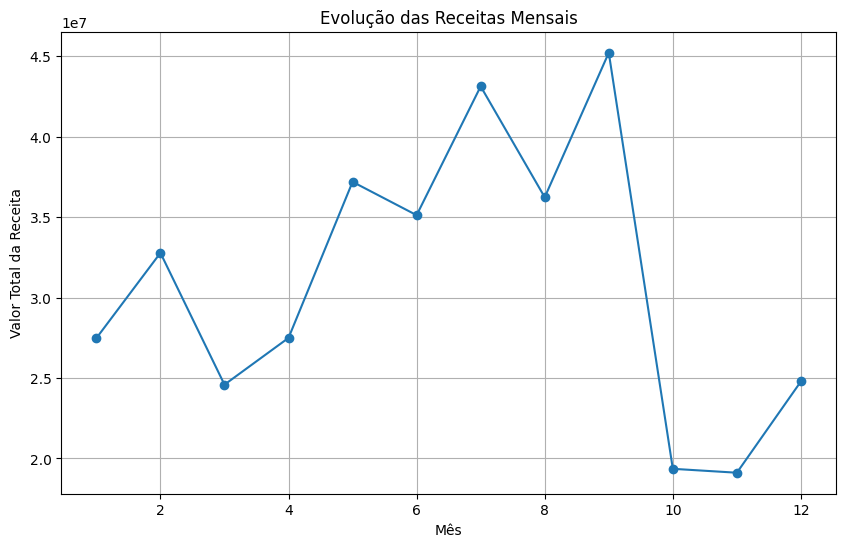

In [57]:
# 5.2 Plotar as Receitas Mensais
try:
    receitas_mensais = receitas_mensais.sort_values(by='Mês')
    plt.figure(figsize=(10, 6))
    plt.plot(receitas_mensais['Mês'], receitas_mensais['Receita'], marker='o')
    plt.title('Evolução das Receitas Mensais')
    plt.xlabel('Mês')
    plt.ylabel('Valor Total da Receita')
    plt.grid(True)
    plt.show()
except NameError as e:
    print('Erro ao plotar: variáveis não encontradas. Execute as células anteriores que calculam receitas_mensais.')
    print('Detalhe:', e)
except Exception as e:
    print('Erro ao tentar plotar:', e)


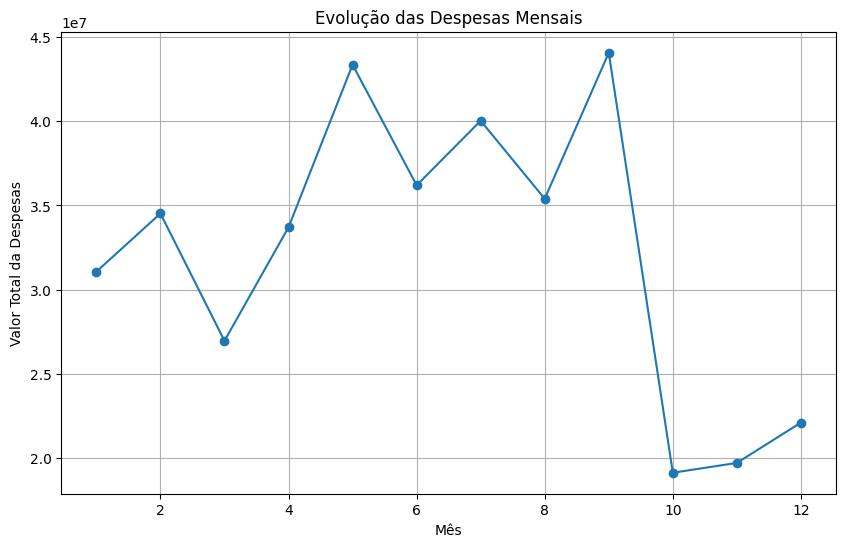

In [58]:
# 5.3 Plotar as Despesas Mensais
try:
    despesas_mensais = despesas_mensais.sort_values(by='Mês')
    plt.figure(figsize=(10, 6))
    plt.plot(despesas_mensais['Mês'], despesas_mensais['Despesa'], marker='o')
    plt.title('Evolução das Despesas Mensais')
    plt.xlabel('Mês')
    plt.ylabel('Valor Total da Despesas')
    plt.grid(True)
    plt.show()
except NameError as e:
    print('Erro ao plotar: variáveis não encontradas. Execute as células anteriores que calculam despesas_mensais.')
    print('Detalhe:', e)
except Exception as e:
    print('Erro ao tentar plotar:', e)

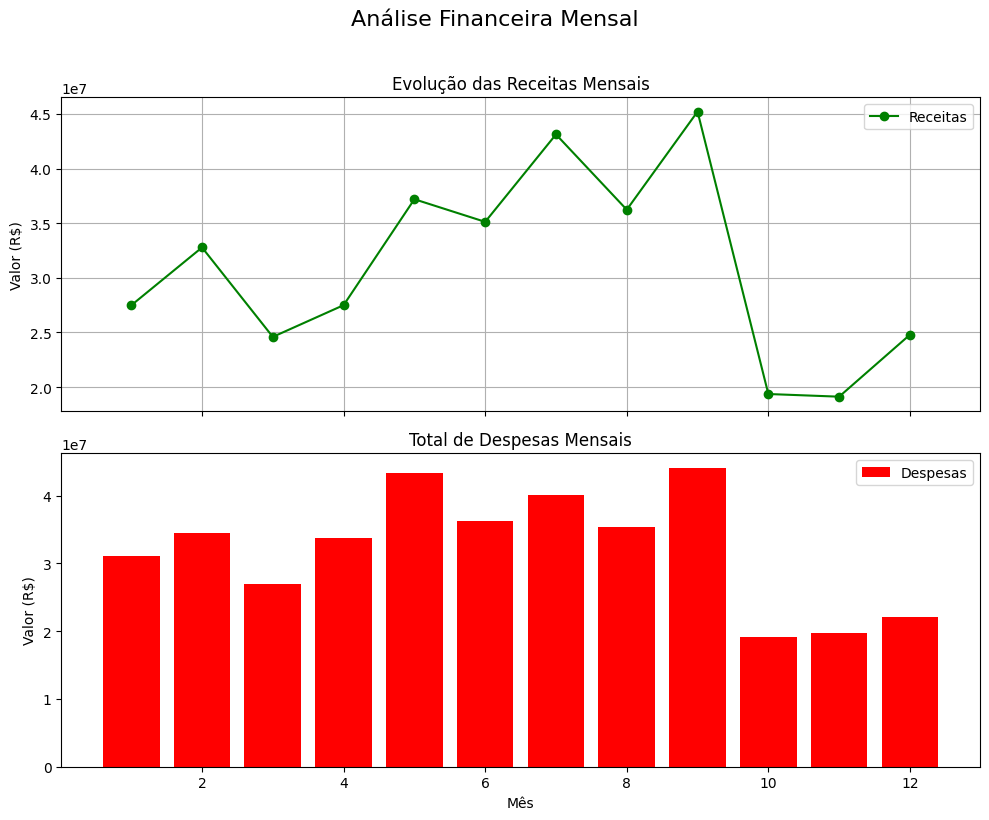

In [59]:
import matplotlib.pyplot as plt
import pandas as pd

# 5.4 CRIAÇÃO DOS SUBPLOTS
receitas_mensais = transacoes_df[transacoes_df['tipo'].str.strip().str.lower() == 'receita'].groupby('Mês')['valor'].sum().reset_index()
despesas_mensais = transacoes_df[transacoes_df['tipo'].str.strip().str.lower() == 'despesa'].groupby('Mês')['valor'].sum().reset_index()


# 5.5 CRIAÇÃO DOS SUBPLOTS
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10, 8), sharex=True)

# 5.6 PLOT 1: Gráfico de Linha (Receitas)
ax1.plot(receitas_mensais['Mês'], receitas_mensais['valor'], 
         color='g', marker='o', label='Receitas')
ax1.set_title('Evolução das Receitas Mensais')
ax1.set_ylabel('Valor (R$)')
ax1.grid(True) 
ax1.legend()

# 5.7 PLOT 2: Gráfico de Barras (Despesas)
ax2.bar(despesas_mensais['Mês'], despesas_mensais['valor'], 
        color='r', label='Despesas')
ax2.set_title('Total de Despesas Mensais')
ax2.set_xlabel('Mês') 
ax2.set_ylabel('Valor (R$)')
ax2.legend()

# 5.8 AJUSTES FINAIS
fig.suptitle('Análise Financeira Mensal', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

# 6. Visualizações Estatísticas com Seaborn

In [60]:
# 6.1. Instalação (se necessário) e Importação
# Usando %pip para instalar diretamente no kernel do notebook
# Isso evita o erro "'pip' não é reconhecido"
print("--- Instalando seaborn (se necessário)... ---")
%pip install seaborn

print("--- Importando bibliotecas... ---")
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

print("--- Bibliotecas instaladas e importadas com sucesso! ---")

--- Instalando seaborn (se necessário)... ---


Note: you may need to restart the kernel to use updated packages.
--- Importando bibliotecas... ---
--- Bibliotecas instaladas e importadas com sucesso! ---



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [61]:
# 6.2 Preparação dos Dados

# (Usando um exemplo com mais dados para os gráficos ficarem melhores)
np.random.seed(42) # Para resultados reproduzíveis

dados = {
    'tipo': np.random.choice(['receita', 'despesa', 'investimento'], 200),
    'valor': np.abs(np.random.normal(1500, 800, 200)).astype(int),
    'Mes': np.random.randint(1, 13, 200),
    'impostos': np.abs(np.random.normal(100, 50, 200)).astype(int)
}
transacoes_df = pd.DataFrame(dados)

# Ajustando valores de 'despesa' para serem negativos (mais realista)
transacoes_df.loc[transacoes_df['tipo'] == 'despesa', 'valor'] *= -1

--- Gerando Gráfico 6.3: Box Plot ---


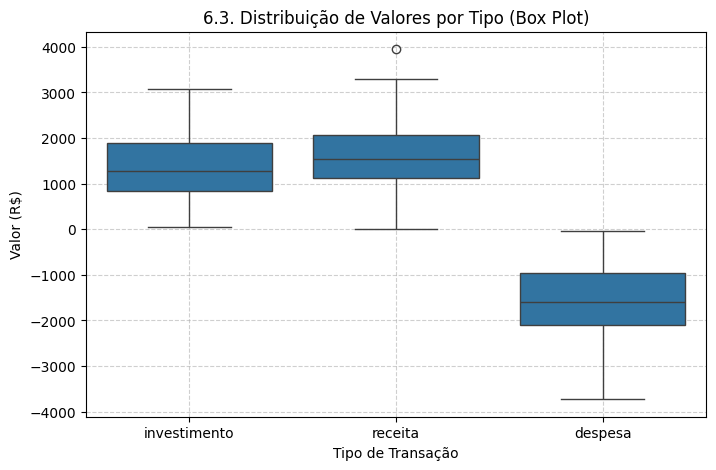

In [62]:
# 6.3 Box Plot (distribuição por categoria)

print("--- Gerando Gráfico 6.3: Box Plot ---")
plt.figure(figsize=(8, 5))
sns.boxplot(x='tipo', y='valor', data=transacoes_df)
plt.title('6.3. Distribuição de Valores por Tipo (Box Plot)')
plt.ylabel('Valor (R$)')
plt.xlabel('Tipo de Transação')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

--- Gerando Gráfico 6.4: Violin Plot ---


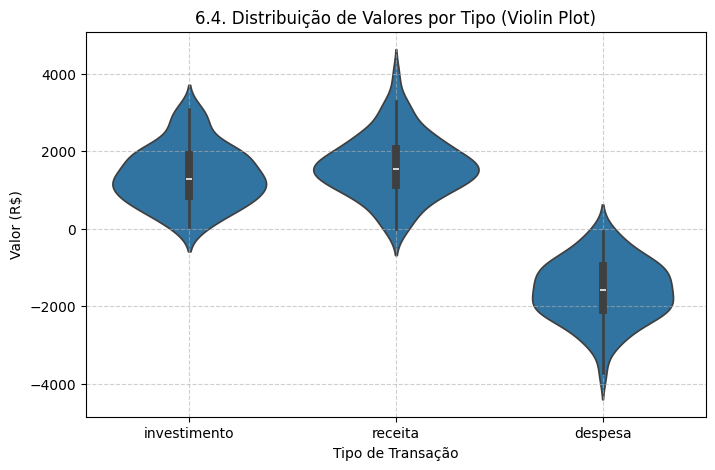

In [63]:
# 6.4 Violin Plot (Box Plot + Densidade)

print("--- Gerando Gráfico 6.4: Violin Plot ---")
plt.figure(figsize=(8, 5))
sns.violinplot(x='tipo', y='valor', data=transacoes_df)
plt.title('6.4. Distribuição de Valores por Tipo (Violin Plot)')
plt.ylabel('Valor (R$)')
plt.xlabel('Tipo de Transação')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

--- Gerando Gráfico 6.5: Distribuição (Receitas) ---


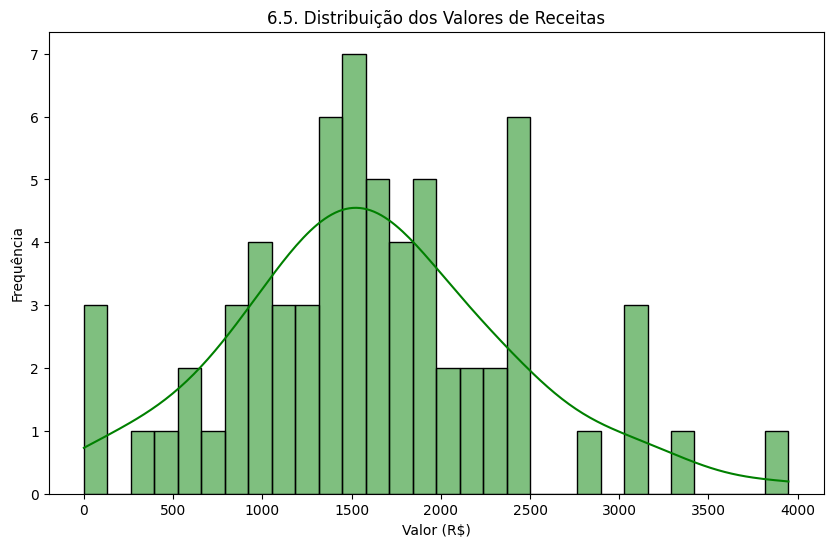

In [64]:
# 6.5 Gráfico de Distribuição (Histograma + KDE)

# (Filtrando só as receitas para este exemplo)
print("--- Gerando Gráfico 6.5: Distribuição (Receitas) ---")
receitas_df = transacoes_df[transacoes_df['tipo'] == 'receita']

plt.figure(figsize=(10, 6))
sns.histplot(receitas_df['valor'], kde=True, bins=30, color='green')
plt.title('6.5. Distribuição dos Valores de Receitas')
plt.xlabel('Valor (R$)')
plt.ylabel('Frequência')
plt.show()

--- Gerando Gráfico 6.7: Heatmap de Correlação ---


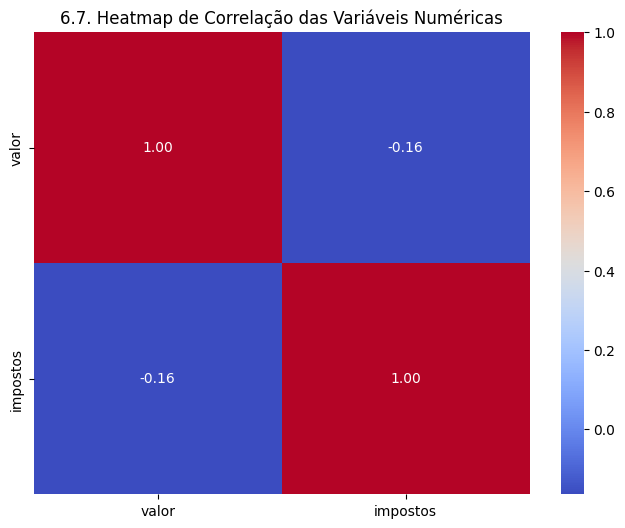

--- Seção 6 finalizada: Todos os gráficos foram gerados. ---


In [65]:
# 6.7 Heatmap de Correlação

print("--- Gerando Gráfico 6.7: Heatmap de Correlação ---")
# 1. Selecionar apenas as colunas numéricas
df_numeric = transacoes_df.select_dtypes(include=['float64', 'int64'])

# 2. Calcular a matriz de correlação
corr_matrix = df_numeric.corr()

# 3. Plotar o Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    corr_matrix, 
    annot=True,     # Mostra os números
    cmap='coolwarm',# Esquema de cores
    fmt=".2f"       # Formata com 2 casas decimais
)
plt.title('6.7. Heatmap de Correlação das Variáveis Numéricas')
plt.show()

print("--- Seção 6 finalizada: Todos os gráficos foram gerados. ---")